In [43]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from numpy import random
from sklearn.preprocessing import MinMaxScaler

In [44]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Dataset loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cached_data_1.csv')[:6500]
df['datetime'] = pd.to_datetime(df['datetime'])
df

,ssx10maa01cp001,ssx10maa01ct001,ssx10lbg40cp920,ssx10mag10cp930,ssx10lca10ct001,ssx10lbg11cp920,ssx10lca20cf001,ssx10pab10cf001,ssx10pab30cf001,ssx10pab10ct001,ssx10pab30ct001,ssx10pab20ct001,ssx10pab60ct001,datetime
0,10.280293,NaN,NaN,44.692989,NaN,NaN,NaN,NaN,NaN,NaN,227.310516,NaN,NaN,2024-07-03 16:07:48.416339
1,10.280299,43.861078,30.324363,44.685636,3495.018760,0.492636,103.993841,44.414816,29.833429,6.222737,227.033785,489.181848,3480.029109,2024-07-03 16:07:49.137844
2,10.280309,43.861061,30.324329,44.678416,3495.018870,0.492596,103.992434,44.414764,29.833386,6.222810,227.076120,489.185436,3480.029215,2024-07-03 16:07:49.854255
3,10.280360,43.861040,30.324279,44.667837,3495.019077,0.492475,103.990082,44.414698,29.833321,6.222911,226.838903,489.188521,3480.029416,2024-07-03 16:07:50.576451
4,10.280356,43.860894,30.323846,44.591666,3495.021902,0.492105,103.997444,44.414320,29.832765,6.223225,223.340832,489.204288,3480.032155,2024-07-03 16:07:58.400444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,10.170121,43.627825,30.096310,44.202618,3497.452778,0.494890,104.001489,44.175580,29.544994,6.219892,193.024594,489.131467,3482.437289,2024-07-03 17:26:30.939906
6496,10.170236,43.628148,30.096281,44.214490,3497.453460,0.494803,104.000633,44.176106,29.544957,6.220182,193.825466,489.128179,3482.437962,2024-07-03 17:26:31.669966
6497,10.170339,43.628498,30.096247,44.227968,3497.454204,0.494703,103.999639,44.176681,29.544916,6.220500,194.627219,489.124516,3482.438699,2024-07-03 17:26:32.394840
6498,10.170395,43.628796,30.096218,44.239666,3497.454811,0.494616,103.998618,44.177168,29.544879,6.220770,194.863701,489.121422,3482.439300,2024-07-03 17:26:33.106746


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ssx10maa01cp001  6500 non-null   float64       
 1   ssx10maa01ct001  6499 non-null   float64       
 2   ssx10lbg40cp920  6499 non-null   float64       
 3   ssx10mag10cp930  6500 non-null   float64       
 4   ssx10lca10ct001  6499 non-null   float64       
 5   ssx10lbg11cp920  6499 non-null   float64       
 6   ssx10lca20cf001  6499 non-null   float64       
 7   ssx10pab10cf001  6499 non-null   float64       
 8   ssx10pab30cf001  6499 non-null   float64       
 9   ssx10pab10ct001  6499 non-null   float64       
 10  ssx10pab30ct001  6500 non-null   float64       
 11  ssx10pab20ct001  6499 non-null   float64       
 12  ssx10pab60ct001  6499 non-null   float64       
 13  datetime         6500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory

In [47]:
df.dropna(inplace=True)
df

,ssx10maa01cp001,ssx10maa01ct001,ssx10lbg40cp920,ssx10mag10cp930,ssx10lca10ct001,ssx10lbg11cp920,ssx10lca20cf001,ssx10pab10cf001,ssx10pab30cf001,ssx10pab10ct001,ssx10pab30ct001,ssx10pab20ct001,ssx10pab60ct001,datetime
1,10.280299,43.861078,30.324363,44.685636,3495.018760,0.492636,103.993841,44.414816,29.833429,6.222737,227.033785,489.181848,3480.029109,2024-07-03 16:07:49.137844
2,10.280309,43.861061,30.324329,44.678416,3495.018870,0.492596,103.992434,44.414764,29.833386,6.222810,227.076120,489.185436,3480.029215,2024-07-03 16:07:49.854255
3,10.280360,43.861040,30.324279,44.667837,3495.019077,0.492475,103.990082,44.414698,29.833321,6.222911,226.838903,489.188521,3480.029416,2024-07-03 16:07:50.576451
4,10.280356,43.860894,30.323846,44.591666,3495.021902,0.492105,103.997444,44.414320,29.832765,6.223225,223.340832,489.204288,3480.032155,2024-07-03 16:07:58.400444
5,10.280335,43.860864,30.323812,44.587058,3495.022157,0.492273,103.998382,44.414288,29.832722,6.223229,222.949995,489.204080,3480.032402,2024-07-03 16:07:59.117320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,10.170121,43.627825,30.096310,44.202618,3497.452778,0.494890,104.001489,44.175580,29.544994,6.219892,193.024594,489.131467,3482.437289,2024-07-03 17:26:30.939906
6496,10.170236,43.628148,30.096281,44.214490,3497.453460,0.494803,104.000633,44.176106,29.544957,6.220182,193.825466,489.128179,3482.437962,2024-07-03 17:26:31.669966
6497,10.170339,43.628498,30.096247,44.227968,3497.454204,0.494703,103.999639,44.176681,29.544916,6.220500,194.627219,489.124516,3482.438699,2024-07-03 17:26:32.394840
6498,10.170395,43.628796,30.096218,44.239666,3497.454811,0.494616,103.998618,44.177168,29.544879,6.220770,194.863701,489.121422,3482.439300,2024-07-03 17:26:33.106746


In [48]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
ssx10maa01cp001,6499.0,10.21232,10.107505,10.182673,10.21499,10.243734,10.297359,0.04189
ssx10maa01ct001,6499.0,43.725483,43.535438,43.665326,43.730649,43.79085,43.879265,0.081014
ssx10lbg40cp920,6499.0,30.204711,30.096193,30.14726,30.201927,30.260752,30.324363,0.065729
ssx10mag10cp930,6499.0,44.789815,42.558354,44.600067,44.886422,45.133435,45.481991,0.506242
ssx10lca10ct001,6499.0,3496.280875,3495.015585,3495.633408,3496.281624,3496.909334,3497.548425,0.722023
ssx10lbg11cp920,6499.0,0.499737,0.485544,0.492735,0.500845,0.506172,0.513834,0.007021
ssx10lca20cf001,6499.0,104.001655,103.972822,103.986496,104.003382,104.01604,104.067541,0.01567
ssx10pab10cf001,6499.0,44.276396,44.079119,44.216654,44.281583,44.342803,44.433651,0.083064
ssx10pab30cf001,6499.0,29.681455,29.544848,29.608761,29.677632,29.752207,29.833429,0.083111
ssx10pab10ct001,6499.0,6.224085,6.193525,6.222584,6.225465,6.227788,6.236139,0.006509


In [49]:
hour = 60*60
minute = 60
my_time = df.pop('datetime')
timestamp_s = my_time.map(pd.Timestamp.timestamp)
df['Hour_sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
df['Hour_cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
df['Minute_sin'] = np.sin(timestamp_s * (2 * np.pi / minute))
df['Minute_cos'] = np.cos(timestamp_s * (2 * np.pi / minute))

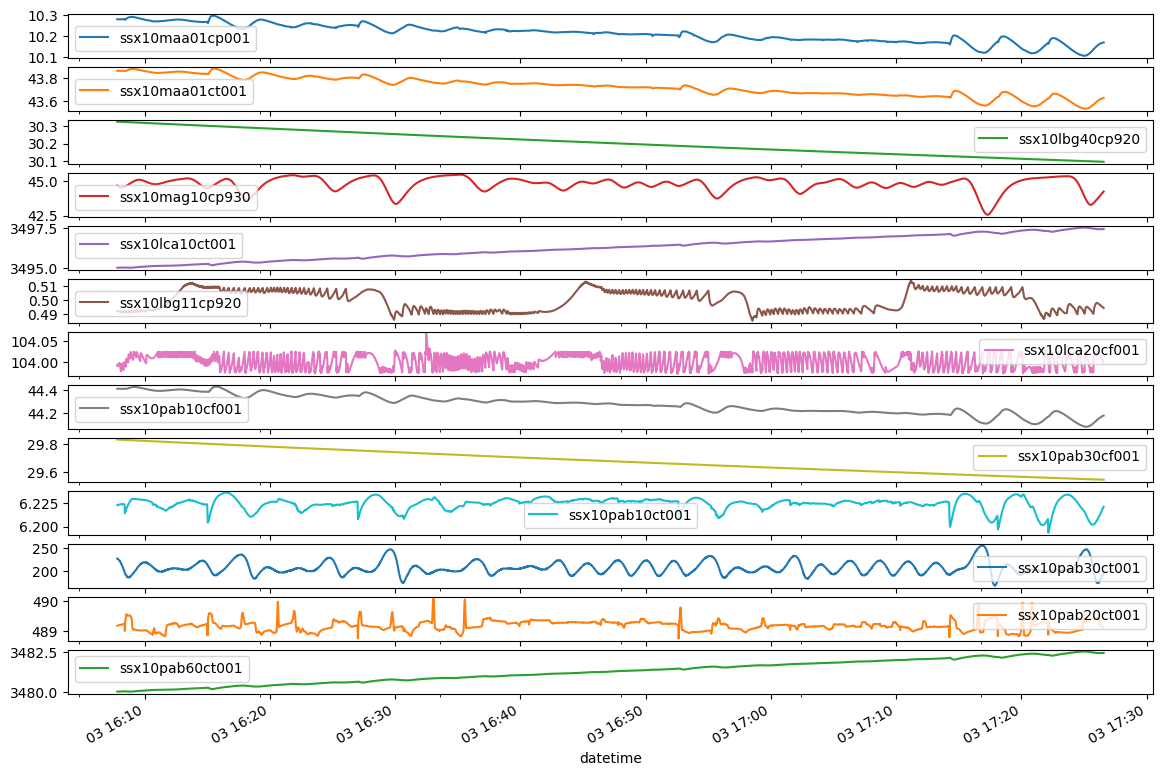

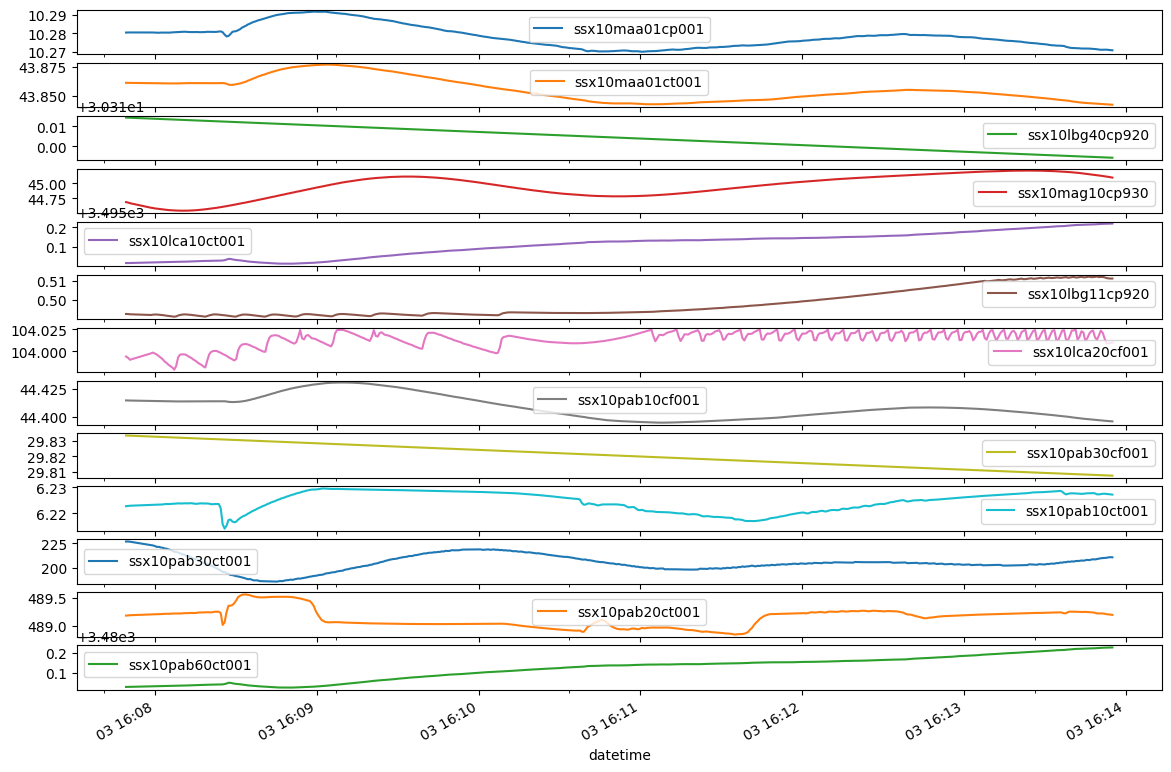

In [50]:
sensors_names = list(df)[:13]

column_indices = {name: i for i, name in enumerate(df.columns)}
num_features = df.shape[1]

mpl.rcParams['figure.figsize'] = (14, 10)

plot_features = df[sensors_names]
plot_features.index = my_time
_ = plot_features.plot(subplots=True)

plot_features = df[sensors_names][:500]
plot_features.index = my_time[:500]
_ = plot_features.plot(subplots=True)

In [51]:
TOTAL = df.shape[0]
TRAIN_VAL = int(TOTAL * 0.5)
VAL_TEST = int(TOTAL * 0.7)

my_scaler = MinMaxScaler()
df_scaled = my_scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
train_df = df[:TRAIN_VAL]
val_df = df[TRAIN_VAL:VAL_TEST]
test_df = df[VAL_TEST:]

print("Training dataset shape:", train_df.shape)
print("Validation dataset shape:", val_df.shape)
print("Test dataset shape:", test_df.shape)

Training dataset shape: (3899, 17)
Validation dataset shape: (650, 17)
Test dataset shape: (1950, 17)


<ipython-input-52-3619cb94f66e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(df.keys(), rotation=90)


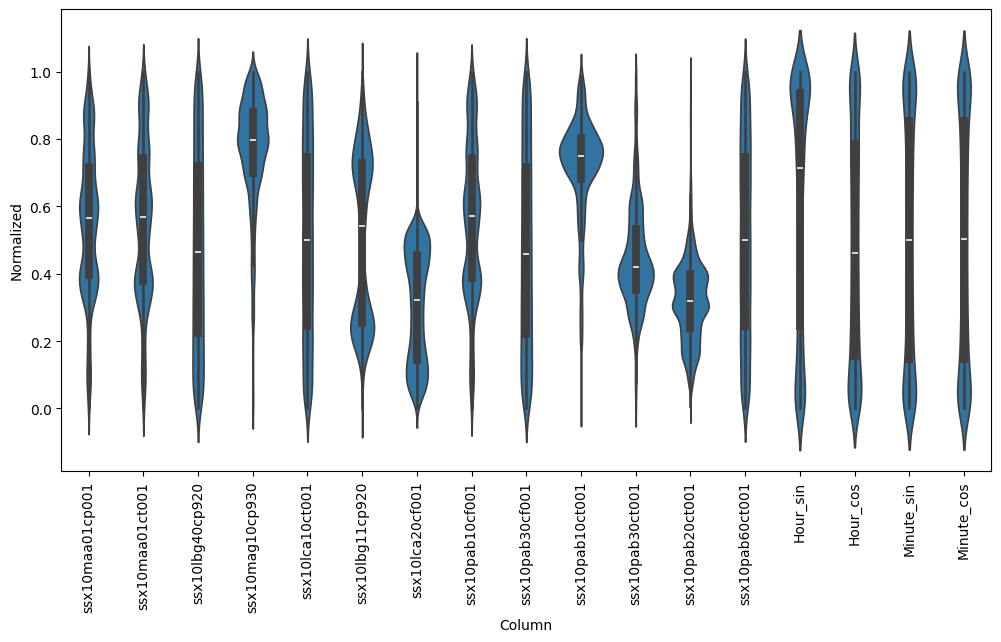

In [52]:
df_std = df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [53]:
INPUT_TIMES = 72
OUTPUT_TIMES = 24
# Single step dataset preparation
def multiStepSampler(df, window_input=INPUT_TIMES, window_output=OUTPUT_TIMES):
	xRes = []
	yRes = []
	for i in range(0, len(df) - window_input - window_output):
		xRes.append(df.iloc[i:i + window_input].values)
		yRes.append(df.iloc[i + window_input:i + window_input + window_output].values)
	return np.array(xRes), np.array(yRes)

In [54]:
# Dataset splitting
(X_train, y_train) = multiStepSampler(train_df)
(X_val, y_val) = multiStepSampler(val_df)
(X_test, y_test) = multiStepSampler(test_df)

In [55]:
multivariate_lstm = tf.keras.Sequential()
multivariate_lstm.add(
    tf.keras.layers.LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2])))
multivariate_lstm.add(tf.keras.layers.Dropout(0.2))
multivariate_lstm.add(tf.keras.layers.Dense(y_train.shape[1] * y_train.shape[2],
                                            activation='linear'))
multivariate_lstm.add(
    tf.keras.layers.Reshape([y_train.shape[1], y_train.shape[2]]))
multivariate_lstm.compile(loss=tf.keras.losses.MeanSquaredError(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=[tf.keras.metrics.MeanAbsoluteError()])
multivariate_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               174400    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 408)               82008     
                                                                 
 reshape_2 (Reshape)         (None, 24, 17)            0         
                                                                 
Total params: 256408 (1001.59 KB)
Trainable params: 256408 (1001.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
MAX_EPOCHS = 10
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')
history = multivariate_lstm.fit(X_train, y_train, epochs=MAX_EPOCHS,
                                validation_data=(X_val, y_val),
                                callbacks=[early_stopping])

Epoch 1/10
119/119 [==============================] - 26s 193ms/step - loss: 0.0499 - mean_absolute_error: 0.1600 - val_loss: 0.0290 - val_mean_absolute_error: 0.1326
Epoch 2/10
119/119 [==============================] - 21s 176ms/step - loss: 0.0112 - mean_absolute_error: 0.0812 - val_loss: 0.0224 - val_mean_absolute_error: 0.1203
Epoch 3/10
119/119 [==============================] - 24s 199ms/step - loss: 0.0082 - mean_absolute_error: 0.0692 - val_loss: 0.0172 - val_mean_absolute_error: 0.1017
Epoch 4/10
119/119 [==============================] - 21s 175ms/step - loss: 0.0068 - mean_absolute_error: 0.0620 - val_loss: 0.0124 - val_mean_absolute_error: 0.0864
Epoch 5/10
119/119 [==============================] - 22s 187ms/step - loss: 0.0061 - mean_absolute_error: 0.0581 - val_loss: 0.0126 - val_mean_absolute_error: 0.0860
Epoch 6/10
119/119 [==============================] - 22s 182ms/step - loss: 0.0055 - mean_absolute_error: 0.0551 - val_loss: 0.0116 - val_mean_absolute_error: 0.083

58/58 [==============================] - 4s 54ms/step


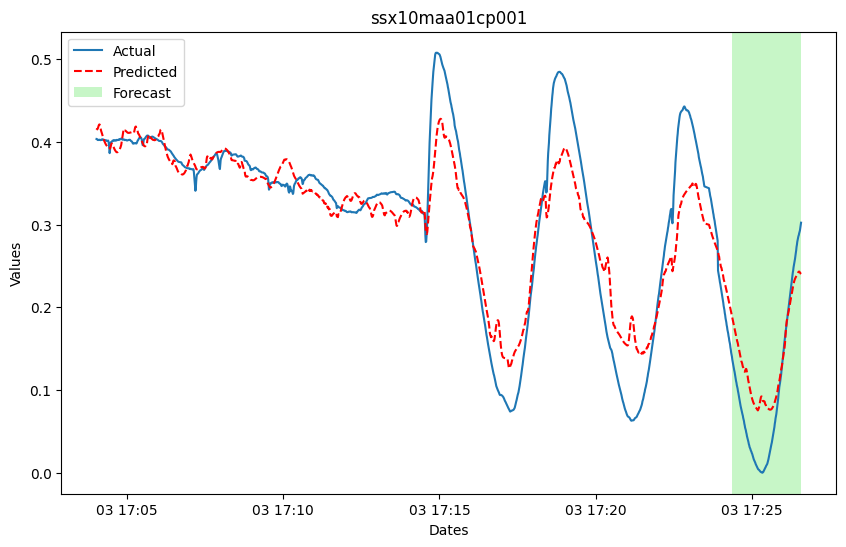

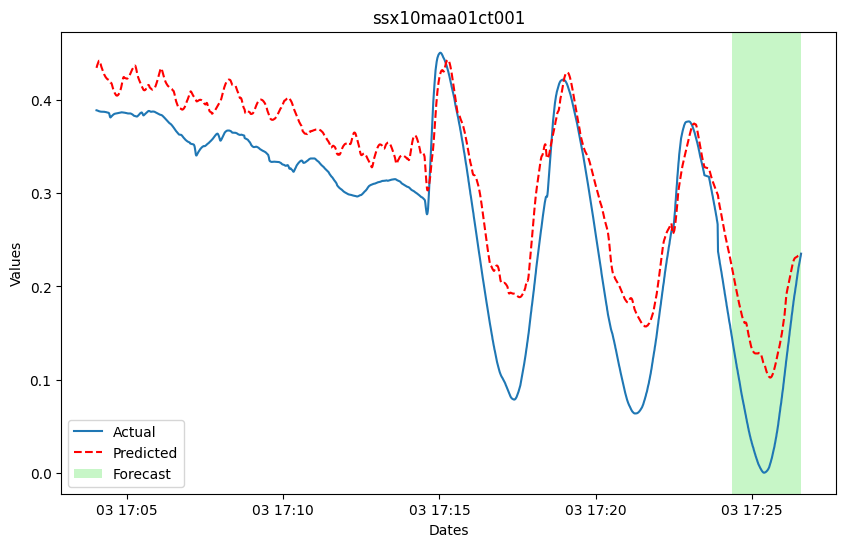

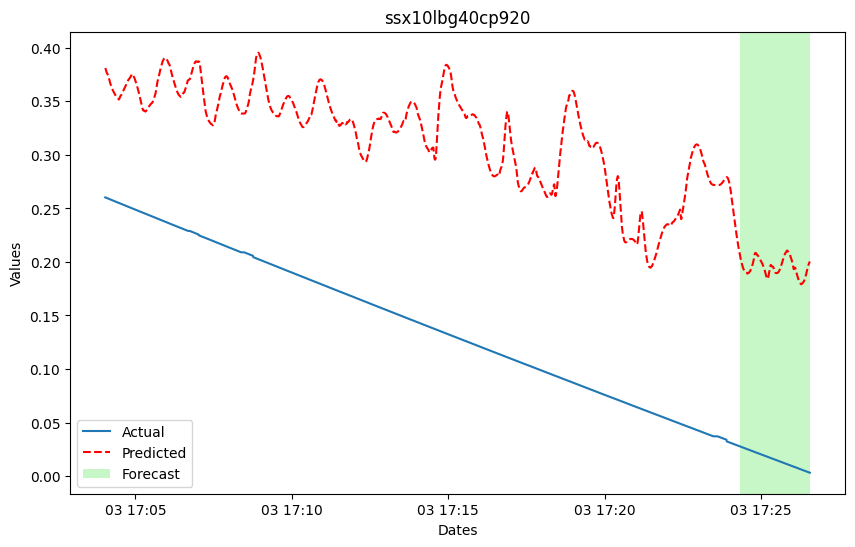

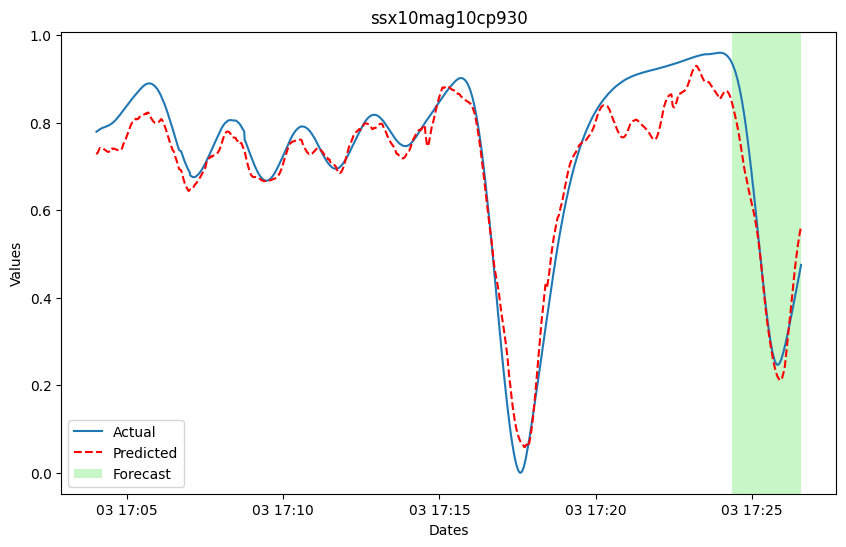

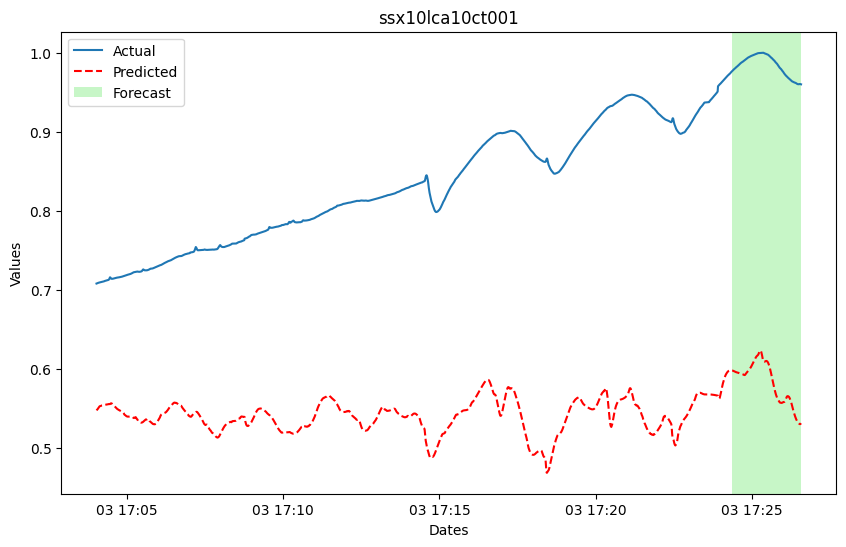

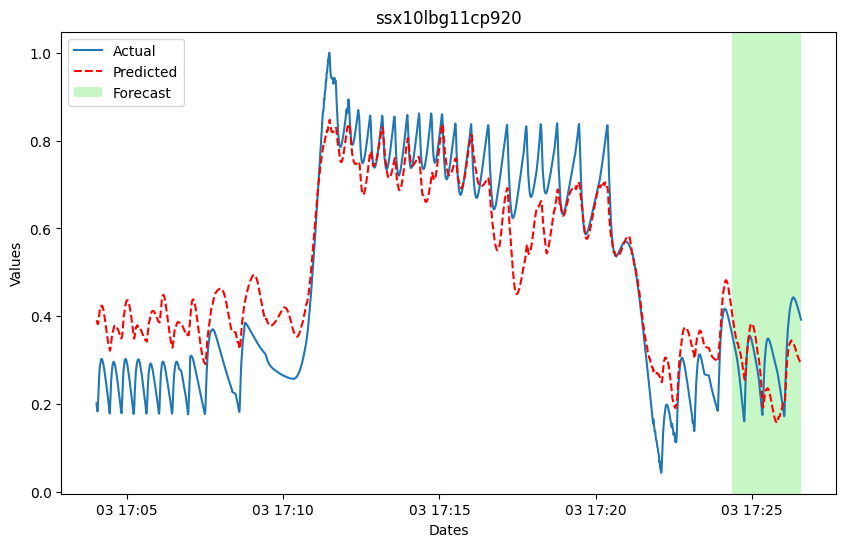

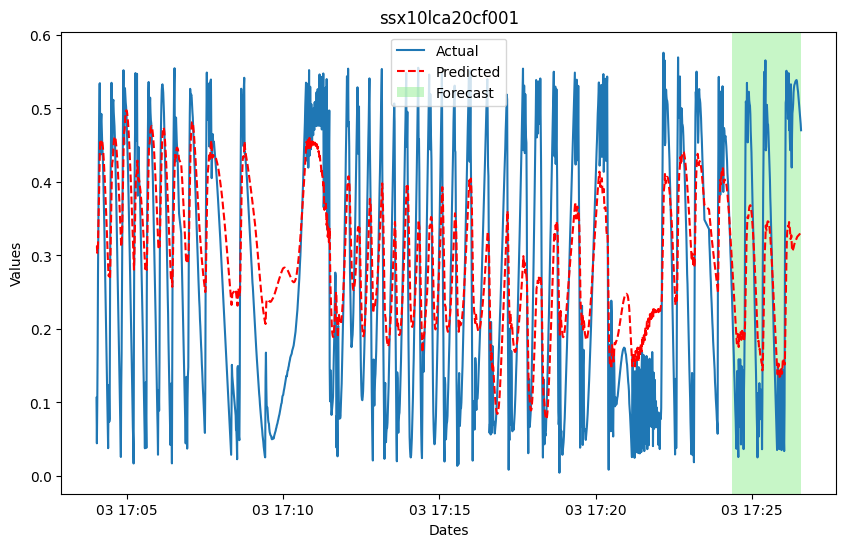

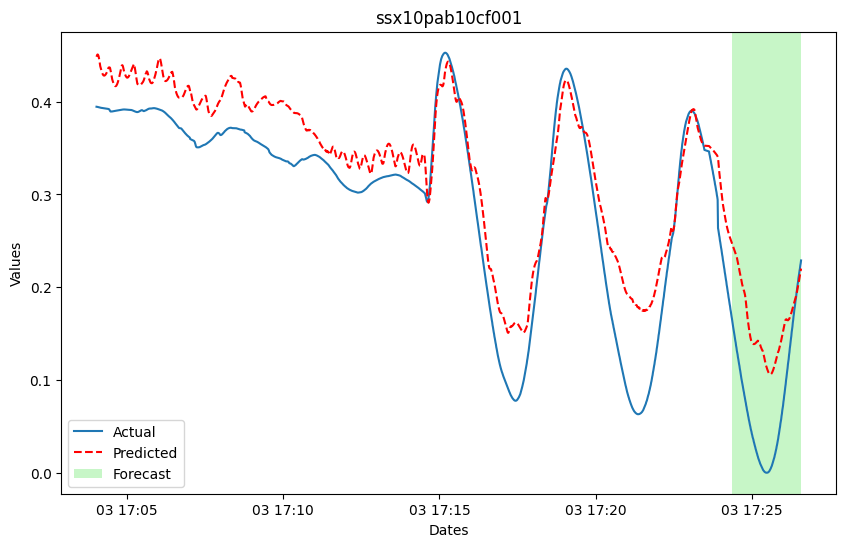

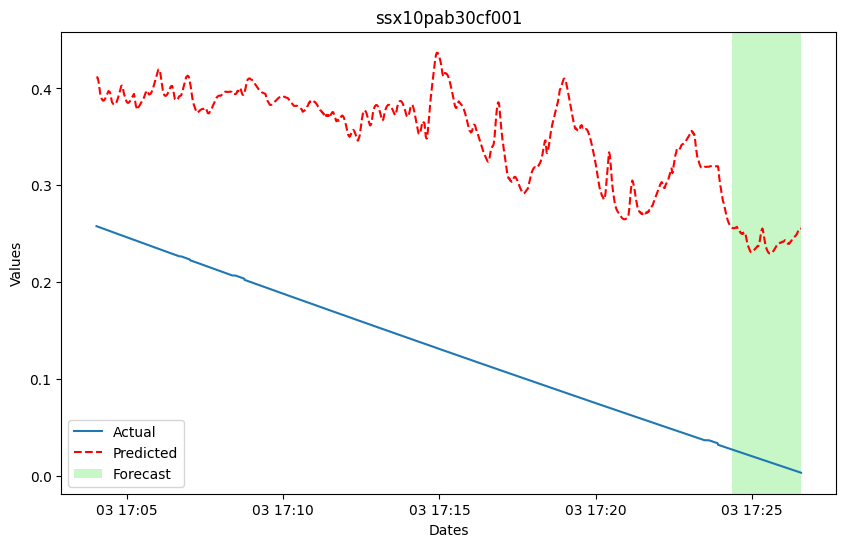

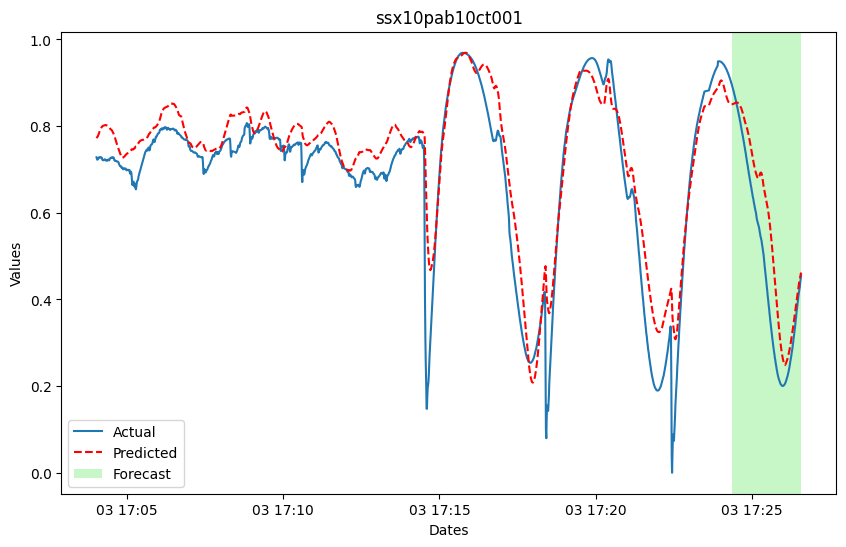

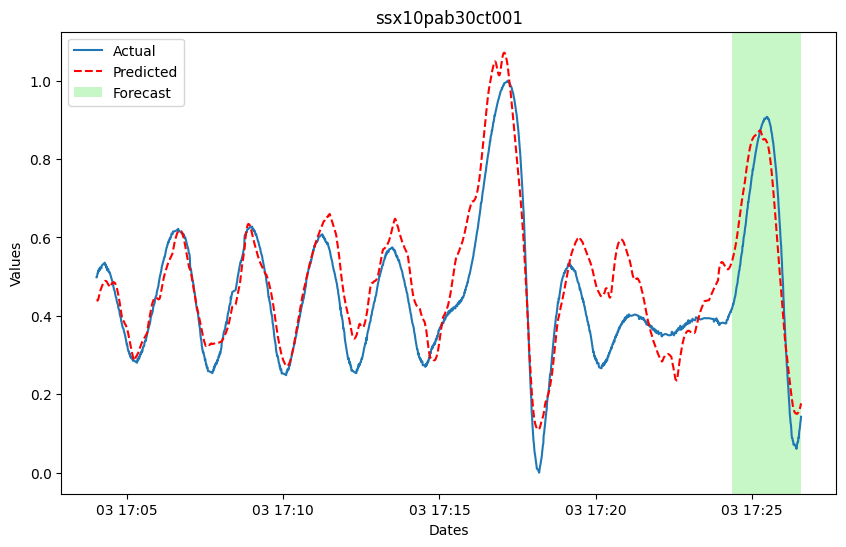

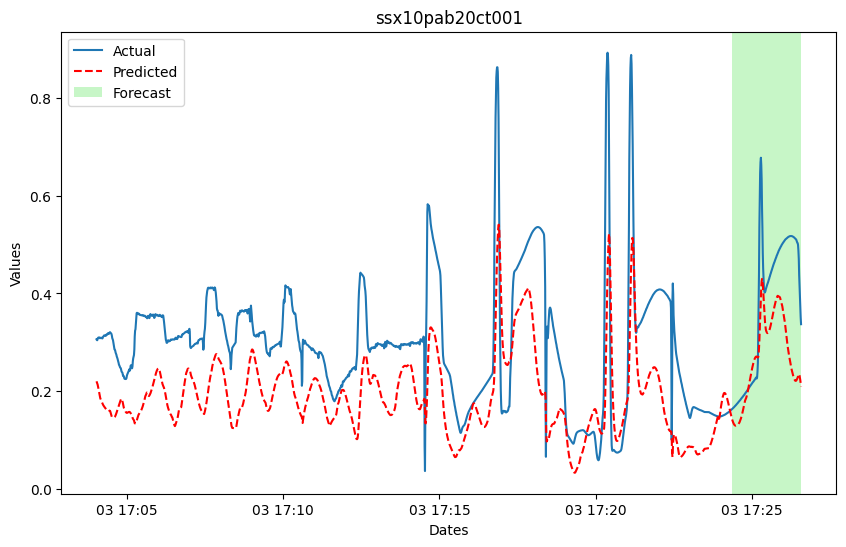

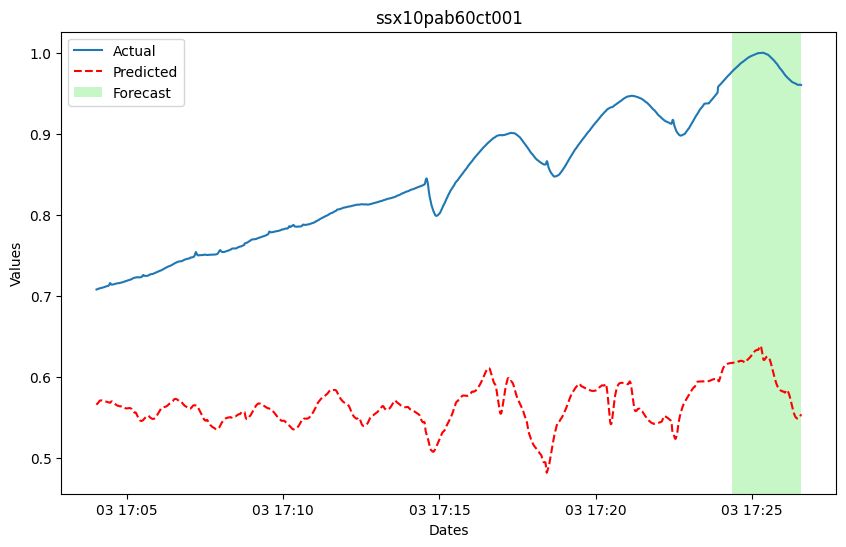

In [57]:
# Forecast Plot with Dates on X-axis
predicted_values = multivariate_lstm.predict(X_test)

d_pred = pd.DataFrame(predicted_values[:, 0], columns=df.columns)
d_pred.index = my_time[-len(d_pred):]
d_test = pd.DataFrame(y_test[:, 0], columns=df.columns)
d_test.index = my_time[-len(d_test):]

for ind, sensor in enumerate(sensors_names):
  fig, ax = plt.subplots(figsize=(10, 6))

  # Plot the actual values
  plt.plot(d_test[sensor], label='Actual')

  # Plot predicted values with a dashed line
  plt.plot(d_pred[sensor], label='Predicted', color='r', linestyle='--')

  # Highlight the forecasted portion with a different color
  plt.axvspan(d_test.index[int(len(d_test) * 0.9)], d_test.index[len(d_test) - 1], facecolor='lightgreen', alpha=0.5, label='Forecast')

  plt.title(sensor)
  plt.xlabel('Dates')
  plt.ylabel('Values')
  ax.legend()

In [58]:
# class WindowGenerator():
#   def __init__(self, input_width, label_width, shift,
#                train_df=train_df, val_df=val_df, test_df=test_df,
#                label_columns=None):
#     # Store the raw data.
#     self.train_df = train_df
#     self.val_df = val_df
#     self.test_df = test_df

#     # Work out the label column indices.
#     self.label_columns = label_columns
#     if label_columns is not None:
#       self.label_columns_indices = {name: i for i, name in
#                                     enumerate(label_columns)}
#     self.column_indices = {name: i for i, name in
#                            enumerate(train_df.columns)}

#     # Work out the window parameters.
#     self.input_width = input_width
#     self.label_width = label_width
#     self.shift = shift

#     self.total_window_size = input_width + shift

#     self.input_slice = slice(0, input_width)
#     self.input_indices = np.arange(self.total_window_size)[self.input_slice]

#     self.label_start = self.total_window_size - self.label_width
#     self.labels_slice = slice(self.label_start, None)
#     self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

#   def __repr__(self):
#     return '\n'.join([
#         f'Total window size: {self.total_window_size}',
#         f'Input indices: {self.input_indices}',
#         f'Label indices: {self.label_indices}',
#         f'Label column name(s): {self.label_columns}'])

#   def split_window(self, features):
#     inputs = features[:, self.input_slice, :]
#     labels = features[:, self.labels_slice, :]
#     if self.label_columns is not None:
#       labels = tf.stack(
#           [labels[:, :, self.column_indices[name]] for name in self.label_columns],
#           axis=-1)

#     # Slicing doesn't preserve static shape information, so set the shapes
#     # manually. This way the `tf.data.Datasets` are easier to inspect.
#     inputs.set_shape([None, self.input_width, None])
#     labels.set_shape([None, self.label_width, None])

#     return inputs, labels

#   def plot(self, model=None, plot_col=sensors_names[0], max_subplots=3):
#     inputs, labels = self.example
#     plt.figure(figsize=(12, 8))
#     plot_col_index = self.column_indices[plot_col]
#     max_n = min(max_subplots, len(inputs))
#     for n in range(max_n):
#       plt.subplot(max_n, 1, n+1)
#       plt.ylabel(f'{plot_col} [normed]')
#       plt.plot(self.input_indices, inputs[n, :, plot_col_index],
#               label='Inputs', marker='.', zorder=-10)

#       if self.label_columns:
#         label_col_index = self.label_columns_indices.get(plot_col, None)
#       else:
#         label_col_index = plot_col_index

#       if label_col_index is None:
#         continue

#       plt.scatter(self.label_indices, labels[n, :, label_col_index],
#                   edgecolors='k', label='Labels', c='#2ca02c', s=64)
#       if model is not None:
#         predictions = model(inputs)
#         plt.scatter(self.label_indices, predictions[n, :, label_col_index],
#                     marker='X', edgecolors='k', label='Predictions',
#                     c='#ff7f0e', s=64)

#       if n == 0:
#         plt.legend()

#     plt.xlabel('Time [h]')

#   def make_dataset(self, data):
#     data = np.array(data, dtype=np.float32)
#     ds = tf.keras.utils.timeseries_dataset_from_array(
#         data=data,
#         targets=None,
#         sequence_length=self.total_window_size,
#         sequence_stride=1,
#         shuffle=True,
#         batch_size=32,)

#     ds = ds.map(self.split_window)

#     return ds

##   @property
#   def train(self):
#     return self.make_dataset(self.train_df)

##   @property
#   def val(self):
#     return self.make_dataset(self.val_df)

##   @property
#   def test(self):
#     return self.make_dataset(self.test_df)

##   @property
#   def example(self):
#     """Get and cache an example batch of `inputs, labels` for plotting."""
#     result = getattr(self, '_example', None)
#     if result is None:
#       # No example batch was found, so get one from the `.train` dataset
#       result = next(iter(self.train))
#       # And cache it for next time
#       self._example = result
#     return result

In [59]:
# OUT_STEPS = 72
# multi_window = WindowGenerator(input_width=72,
#                                label_width=OUT_STEPS,
#                                shift=OUT_STEPS)

# for sensor in sensors_names:
#   multi_window.plot(plot_col=sensor)
# multi_window

In [60]:
# MAX_EPOCHS = 100

# def compile_and_fit(model, window, patience=2):
#   early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=patience,
#                                                     mode='min')

#   model.compile(loss=tf.keras.losses.MeanSquaredError(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

#   history = model.fit(window.train, epochs=MAX_EPOCHS,
#                       validation_data=window.val,
#                       callbacks=[early_stopping])
#   return history

In [61]:
# multi_lstm_model = tf.keras.Sequential([
#     # Shape [batch, time, features] => [batch, lstm_units].
#     # Adding more `lstm_units` just overfits more quickly.
#     tf.keras.layers.LSTM(32, return_sequences=False),
#     # Shape => [batch, out_steps*features].
#     tf.keras.layers.Dense(OUT_STEPS*num_features,
#                           kernel_initializer=tf.initializers.zeros()),
#     # Shape => [batch, out_steps, features].
#     tf.keras.layers.Reshape([OUT_STEPS, num_features])
# ])

# # multi_lstm_model = autoencoder_model()
# history = compile_and_fit(multi_lstm_model, multi_window)

# # IPython.display.clear_output()

# for sensor in sensors_names:
#   multi_window.plot(multi_lstm_model, plot_col=sensor)

In [62]:
# my_pred = multi_lstm_model.predict(multi_window.test)
# # my_pred = my_scaler.inverse_transform(my_pred)
# preds_line = []
# for ind in range(len(sensors_names)):
#   preds_line.append([j for sub in [[val[ind] * train_std[ind] + train_mean[ind] for val in step] for step in my_pred[::24]] for j in sub])
# # my_timeline = pd.date_range("2024-07-01", periods=len(my_pred), freq="h")
# test_df_restored = test_df * train_std + train_mean
# for ind, sensor in enumerate(sensors_names):
#   plt.figure(figsize=(14, 6))
#   plt.plot(my_time[:len(my_pred)], test_df_restored[sensor][:len(my_pred)])
#   plt.plot(my_time[:len(my_pred)], preds_line[ind][:len(my_pred)], c='#2ca02c')
#   plt.title(sensor)

In [63]:
# preds = [val[0] for val in my_pred]
# df_preds = pd.DataFrame(np.array(preds), columns=train_df.keys())
# # df_preds = df_preds * train_std + train_mean
# scored_train = pd.DataFrame(index=train_df.index)
# scored_train['Loss_mae'] = np.mean(np.abs(df_preds-test_df[:len(my_pred)]), axis = 1)
# scored_train['Threshold'] = 0.75
# scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
# scored_train.plot(logy=True,  figsize=(16,9), color=['blue','red'])

In [64]:
# save all model information, including weights, in h5 format
multivariate_lstm.save("/content/drive/MyDrive/Colab Notebooks/model/Cloud_model.keras")
print("Model saved")

Model saved
